In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
#input
n = 300
x = np.random.uniform(0, 1, size=n)
v = np.random.uniform(-0.1, 0.1, size=n)

In [0]:
#output
d = []
for i in range(n):
  d.append(np.sin(20*x[i]) + (3*x[i]) + v[i])

<function matplotlib.pyplot.show>

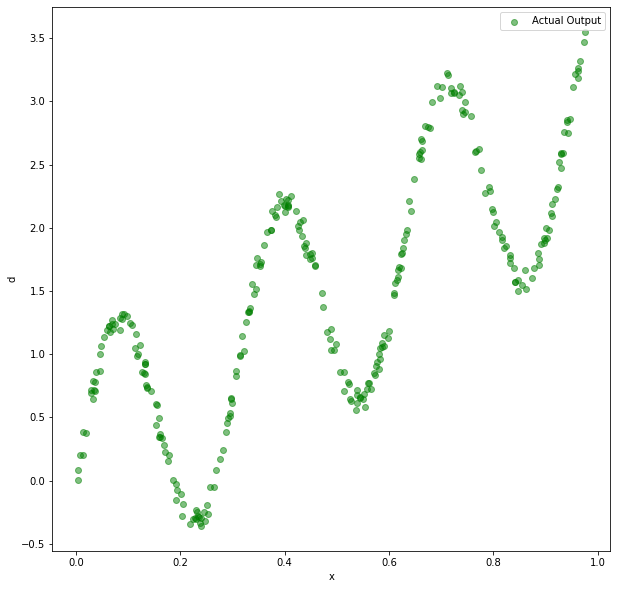

In [0]:
fig, ax = plt.subplots(figsize=(10,10))
plt.xlabel('x')
plt.ylabel('d')
plt.scatter(x, d, c = 'green', alpha=0.5, label = 'Actual Output')
plt.legend(loc = 'upper right')
plt.show

In [0]:
#FF Activation Function
def act_fun(v):
  return np.tanh(v)
def act_output(v):
  return v

In [0]:
#FB Activation Function
def der_act_fun(v):
  return(1 - np.tanh(v)**2)
def der_act_output(v):
  return 1

In [0]:
#weights
N = 24
w_input = np.random.uniform(low=-5, high=5, size=N)
w_output = np.random.uniform(low=-5, high=5, size=N)
w_bias = np.random.uniform(low=-1, high=1, size=N)
w_final = np.random.uniform(low=-1, high=1, size=N)
eta = 5

In [0]:
list_mse = []
z = 0
while(True):
    # FF network
    u = []
    y = []
    alphas = []
    betas = []
    for i in range(n):
        v = []
        temp = []
        for j in range(N):
            alpha = (x[i]*w_input[j]) + w_bias[j]
            temp.append(alpha)
            v.append(act_fun(alpha))
        alphas.append(temp)
        u.append(v)
        beta = np.matmul(np.array(u[i]),w_output) + w_final
        betas.append(beta[0])
        y.append(act_output(beta[0]))

        # FB network
        e = -((d[i] - y[i])*eta*2)/n
        w_output_grad = []
        w_input_grad = []
        w_bias_grad = []
        w_final_grad = []
        delta_final = - e
        w_final_grad.append(delta_final)
        for j in range(N):
            delta_u = e * u[i][j] 
            w_output_grad.append(delta_u)
            delta_w = e  * x[i] * w_output[j] * der_act_fun(alphas[i][j])
            w_input_grad.append(delta_w)
            delta_bias = e * w_output[j] * der_act_fun(alphas[i][j])
            w_bias_grad.append(delta_bias)
        # weight update
        w_input = np.subtract(w_input, np.asarray(w_input_grad))
        w_output = np.subtract(w_output, np.asarray(w_output_grad))
        w_bias = np.subtract(w_bias, np.asarray(w_bias_grad))
        w_final = np.subtract(w_final, np.asarray(w_final_grad))
    # mean square error
    mse = 0
    for i in range(n):
        mse += (d[i] - y[i])**2
    mse = mse/n
    list_mse.append(mse)
    
    print (mse, eta, z)
    
    if list_mse[z] > list_mse[z-1]:
        eta = 0.9*eta
    if list_mse[-1]<0.01:
        break
    z += 1

2.571280967770713 5 0
0.734334864413295 5 1
0.7116851561463032 5 2
0.6976516898117352 5 3
0.6875612314718936 5 4
0.6796541936034106 5 5
0.6731154075901733 5 6
0.6674986909357028 5 7
0.6625315580054406 5 8
0.6580489987358186 5 9
0.6539645469221581 5 10
0.6502460255228374 5 11
0.6468896105770903 5 12
0.6438956378273795 5 13
0.6412521388658334 5 14
0.638929582140546 5 15
0.6368848073263158 5 16
0.6350687368829944 5 17
0.6334332887060141 5 18
0.6319356469515914 5 19
0.6305400594603842 5 20
0.6292180346971064 5 21
0.627947751787989 5 22
0.6267132144146595 5 23
0.6255034199650598 5 24
0.6243116380715806 5 25
0.6231347880018667 5 26
0.6219728522866483 5 27
0.6208282512812577 5 28
0.6197051235848069 5 29
0.6186085039278904 5 30
0.617543449868413 5 31
0.6165142194499694 5 32
0.6155236206269213 5 33
0.6145726281049004 5 34
0.6136603031100256 5 35
0.6127839820609414 5 36
0.6119396488045524 5 37
0.6111223870051534 5 38
0.6103268222235445 5 39
0.6095474937444698 5 40
0.608779129365509 5 41
0.608016

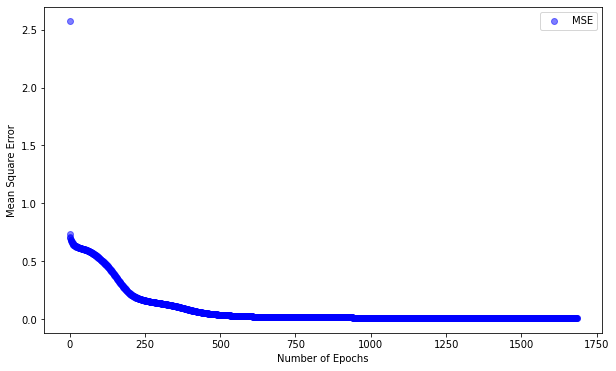

In [0]:
fig, ax = plt.subplots(figsize=(10,6))
plt.ylabel('Mean Square Error')
plt.xlabel('Number of Epochs')
plt.scatter(range(len(list_mse)), list_mse, c = 'blue', alpha=0.5, label = 'MSE')
plt.legend(loc = 'upper right')
plt.show()

In [0]:
u = []
y = []
alphas = []
betas = []
for j in range(n):
    v = []
    temp = []
    for i in range(N):
        alpha = x[j]*w_input[i] + w_bias[i]
        temp.append(alpha)
        v.append(act_fun(alpha))
    alphas.append(temp)
    u.append(v)
    beta = np.matmul(np.array(u[j]),w_output)+w_final
    betas.append(beta)
    y.append(act_output(beta[0]))

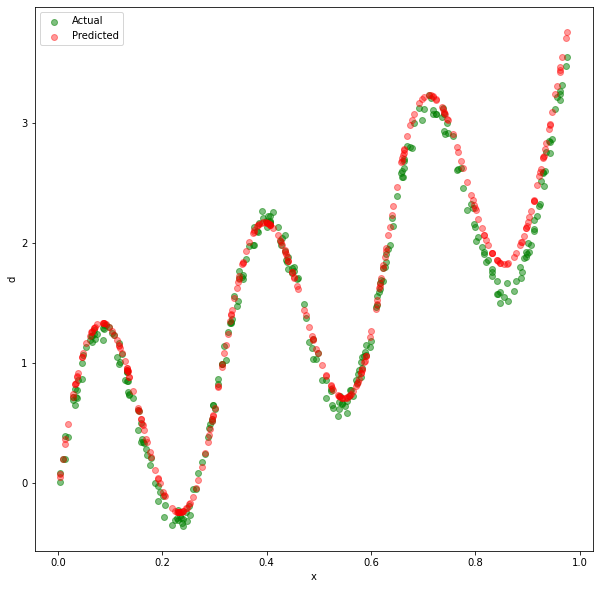

In [0]:
fig, ax = plt.subplots(figsize=(10,10))
plt.ylabel('d')
plt.xlabel('x')
plt.scatter(x,d, c = 'green',alpha=0.5, label = 'Actual')
plt.scatter(x,y, c = 'red',alpha=0.4, label = 'Predicted')
plt.legend(loc = 'best')
plt.show()